In [29]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from scipy.stats import tukey_hsd

In [30]:
"""Modify base_path to point to the folder containing the scripts folder"""
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)

from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot


In [31]:
#Make paths
cwd = os.getcwd()
tmpdir = os.path.normpath(cwd + os.sep + os.pardir)
main_dir = os.path.normpath(tmpdir + os.sep + os.pardir)

print(main_dir)

C:\Users\xagao\OneDrive\Bureau\bio482_miniproject


In [32]:
"""Load data"""
print('Main working directory:', main_dir)
figure_path = os.path.join(main_dir, 'python', 'figures')
os.makedirs(figure_path, exist_ok=True)
data_path = os.path.join(main_dir, 'python/data') #if your folder is organized differently, just specify the full path to the file

fname = 'data_bio482-001.pkl'
data_df = pd.read_pickle(os.path.join(data_path, fname))

Main working directory: C:\Users\xagao\OneDrive\Bureau\bio482_miniproject


In [33]:
"""Create a subset of the data for the analysis of Free Whisking"""
sweep_type = 'free whisking'
time_window = 2    # time window to analyze Vm (s)
freq_band_lim = [1, 10, 30, 90] # low- and high-frequency band limits (Hz)

#data_df_subset = data_df[data_df["Sweep_Type"]==sweep_type]
#data_df_subset = data_df[data_df['Sweep_Type']==sweep_type]
data_df_subset = data_df
all_cells = np.unique(data_df_subset.Cell_ID)
print('Number of cells:', len(all_cells))

Number of cells: 240


In [34]:
data_df[data_df["Cell_Anatomy"]=='L5']

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
10,10.0,L5,1.0,550.0,SC903_1,L5,C2,EXC,False,NaN,...,1.0,"[-0.050484375, -0.050425, -0.05049375, -0.0505...",20000.0,"[6.461, 6.775]","[[0.002, 0.01], [6.226, 6.852], [9.71, 10.946]...",2005.0,active touch,"[11.55361080427187, 5.866629462925175, 0.06826...",100.0,"[[0.01, 5.386], [6.858, 9.516], [10.952, 11.68..."
39,10.0,L5,1.0,650.0,SC909_1,L5,C2,EXC,False,NaN,...,1.0,"[-0.065865625, -0.065815625, -0.06586875, -0.0...",20000.0,nan,"[[0.002, 0.47], [7.884, 8.814], [8.908, 10.046...",2006.0,active touch,"[-1.041554908752434, -1.2676734924316344, -1.2...",100.0,"[[0.52, 2.574], [3.138, 3.71], [4.8, 7.63], [1..."
40,10.0,L5,1.0,650.0,SC909_1,L5,C2,EXC,False,NaN,...,2.0,"[-0.062940625, -0.06293125, -0.062915625, -0.0...",20000.0,nan,"[[0.002, 0.01], [3.22, 3.998], [19.908, 20.0]]",2006.0,active touch,"[13.879621095657347, 28.42545607566833, 41.225...",100.0,"[[0.01, 1.164], [1.796, 2.322], [4.062, 10.69]..."
41,10.0,L5,1.0,650.0,SC909_1,L5,C2,EXC,False,NaN,...,3.0,"[-0.0594875, -0.059484375, -0.059453125, -0.05...",20000.0,nan,"[[0.002, 0.03], [2.76, 4.998], [5.418, 8.746],...",2006.0,active touch,"[0.3423306179046551, 0.731303472518915, 2.2265...",100.0,"[[0.036, 0.488], [1.684, 2.246], [5.052, 5.414..."


In [101]:
data_df.count()

Cell_APThreshold_Slope                  831
Cell_Anatomy                            831
Cell_Counter                            831
Cell_Depth                              814
Cell_ID                                 831
Cell_Layer                              831
Cell_TargetedBrainArea                  831
Cell_Type                               831
Cell_tdTomatoExpressing                 831
Mouse_DateOfBirth                       602
Mouse_Genotype                          831
Mouse_Name                              831
Mouse_Sex                               831
Sweep_ActiveContactTimes                831
Sweep_Counter                           831
Sweep_MembranePotential                 831
Sweep_MembranePotential_SamplingRate    831
Sweep_PassiveContactTimes               831
Sweep_QuietTimes                        830
Sweep_StartTime                         831
Sweep_Type                              831
Sweep_WhiskerAngle                      831
Sweep_WhiskerAngle_SamplingRate 

In [35]:
data_df.groupby('Cell_Anatomy').describe()

Cell_APThreshold_Slope                                         \
                              count       mean       std   min   25%   50%   
Cell_Anatomy                                                                 
L2/3                          218.0  11.743119  5.509780  10.0  10.0  10.0   
L4                            128.0  17.734375  7.446909   0.0  10.0  15.0   
L5                              4.0  10.000000  0.000000  10.0  10.0  10.0   
nan                           481.0  16.361746  6.964651   0.0  10.0  15.0   

                         Cell_Counter            ... Sweep_StartTime          \
               75%   max        count      mean  ...             75%     max   
Cell_Anatomy                                     ...                           
L2/3          10.0  40.0        218.0  1.137615  ...          2009.0  2016.0   
L4            20.0  35.0        128.0  1.804688  ...          2016.0  2017.0   
L5            10.0  10.0          4.0  1.000000  ...          2006.0  2006.0   
nan           20.0  35.0        481.0  1.501040  ...          2015.0  2016.0   

             Sweep_WhiskerAngle_SamplingRate                                   \
                                       count   mean  std    min    25%    50%   
Cell_Anatomy                                                                    
L2/3                                   218.0  100.0  0.0  100.0  100.0  100.0   
L4                                     128.0  100.0  0.0  100.0  100.0  100.0   
L5                                       4.0  100.0  0.0  100.0  100.0  100.0   
nan                                    481.0  100.0  0.0  100.0  100.0  100.0   

                            
                75%    max  
Cell_Anatomy                
L2/3          100.0  100.0  
L4            100.0  100.0  
L5            100.0  100.0  
nan           100.0  100.0  

[4 rows x 64 columns]

In [62]:
data_df[data_df['Cell_Depth'].isna()]

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
695,25.0,nan,2.0,NaN,AP032_2,L2/3,C2,PV,True,2015.0,...,1.0,"[-0.043900002, -0.043940626, -0.043962501, -0....",20000.0,nan,"[[0.002, 0.6], [4.856, 6.658], [7.136, 10.626]...",2015.0,free whisking,"[-137.0508, -137.0508, -137.6991, -137.6991, -...",100.0,"[[0.604, 1.634], [2.092, 4.786], [6.782, 7.132..."
723,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,1.0,"[-0.053934377, -0.053981248, -0.054043751, -0....",20000.0,nan,"[[0.002, 1.606], [1.668, 5.258], [6.57, 7.4], ...",2015.0,free whisking,"[-141.6704, -139.2687, -139.8691, -141.07, -14...",100.0,"[7.404, 8.47]"
724,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,2.0,"[-0.058571875, -0.058571875, -0.058546875, -0....",20000.0,nan,"[[0.002, 2.21], [2.248, 2.824], [5.984, 8.458]...",2015.0,free whisking,"[-145.8735, -145.8735, -145.8735, -145.8735, -...",100.0,"[2.848, 5.97]"
725,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,3.0,"[-0.055190627, -0.055275001, -0.055356249, -0....",20000.0,nan,"[[0.002, 2.344], [2.362, 7.72], [7.744, 9.836]...",2015.0,free whisking,"[-147.0743, -147.0743, -147.0743, -147.0743, -...",100.0,"[[12.756, 15.276], [15.682, 15.922], [18.798, ..."
726,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,4.0,"[-0.045990624, -0.045896877, -0.045850001, -0....",20000.0,nan,"[[0.002, 0.01], [0.536, 1.398], [2.89, 3.616],...",2015.0,free whisking,"[-160.284, -157.2818, -156.6813, -157.8822, -1...",100.0,"[[0.036, 0.46], [1.58, 2.846], [3.62, 3.97], [..."
727,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,5.0,"[-0.050637498, -0.050656252, -0.05064375, -0.0...",20000.0,nan,"[[0.002, 4.146], [6.93, 9.222], [9.434, 13.402...",2015.0,free whisking,"[-145.273, -145.273, -145.273, -145.273, -145....",100.0,"[[4.154, 5.128], [5.564, 6.578], [13.404, 13.9..."
728,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,6.0,"[-0.056031249, -0.056121875, -0.056181248, -0....",20000.0,nan,"[[0.002, 0.29], [1.388, 2.37], [2.888, 5.718],...",2015.0,free whisking,"[-147.0743, -147.0743, -147.6748, -148.8757, -...",100.0,"[[0.46, 1.384], [2.396, 2.748], [5.726, 5.98],..."
729,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,7.0,"[-0.04756875, -0.047512501, -0.047474999, -0.0...",20000.0,nan,"[[0.002, 0.694], [1.636, 8.086], [8.136, 9.144...",2015.0,free whisking,"[-150.677, -150.0765, -150.677, -150.677, -150...",100.0,"[0.698, 1.63]"
730,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,8.0,"[-0.051750001, -0.051778127, -0.051750001, -0....",20000.0,nan,"[[0.002, 1.256], [1.384, 2.148], [2.826, 3.916...",2015.0,free whisking,"[-146.4739, -145.8735, -146.4739, -146.4739, -...",100.0,"[[2.176, 2.824], [5.158, 5.564], [6.774, 7.142..."
731,25.0,nan,1.0,NaN,AP061_1,L2/3,C2,PV,True,2015.0,...,9.0,"[-0.051190626, -0.051240627, -0.051278125, -0....",20000.0,nan,"[[0.002, 0.17], [0.296, 4.616], [4.714, 6.27],...",2015.0,free whisking,"[-142.2708, -142.2708, -142.8713, -142.8713, -...",100.0,"[[6.38, 9.19], [19.664, 19.986]]"


In [55]:
#L2-L3, 250 μm; L3-L4, 400 μm; L4-L5, 600 μm
def define_layer(cell_depth):
    if cell_depth <= 250:
        return 'L2'
    elif 250 < cell_depth <= 400:
        return 'L3'
    elif 400 < cell_depth <= 600:
        return 'L4'
    elif cell_depth > 600:
        return 'L5'
    else:
        return str(cell_depth)
    
data_df[data_df["Cell_Anatomy"]=='nan']["Cell_Depth"].apply(lambda x: define_layer(x)).unique()

array(['L3', 'L4', 'L5', 'L2', 'nan'], dtype=object)

In [117]:
data_df["Sweep_Type"].unique()

array(['active touch', 'passive contact', 'free whisking'], dtype=object)

In [120]:
data_df[data_df["Sweep_Type"] == "passive contact"]

Cell_APThreshold_Slope                  3
Cell_Anatomy                            3
Cell_Counter                            3
Cell_Depth                              3
Cell_ID                                 3
Cell_Layer                              3
Cell_TargetedBrainArea                  3
Cell_Type                               3
Cell_tdTomatoExpressing                 3
Mouse_DateOfBirth                       0
Mouse_Genotype                          3
Mouse_Name                              3
Mouse_Sex                               3
Sweep_ActiveContactTimes                3
Sweep_Counter                           3
Sweep_MembranePotential                 3
Sweep_MembranePotential_SamplingRate    3
Sweep_PassiveContactTimes               3
Sweep_QuietTimes                        3
Sweep_StartTime                         3
Sweep_Type                              3
Sweep_WhiskerAngle                      3
Sweep_WhiskerAngle_SamplingRate         3
Sweep_WhiskingTimes               

In [121]:
data_df["Layer"] = data_df["Cell_Depth"].apply(lambda x: define_layer(x))
#data_df[data_df["Layer"]=="nan"]["Layer"] = data_df[data_df["Layer"]=="nan"]["Cell_Layer"]

data_df.loc[data_df["Layer"]=="nan", "Layer"] = data_df.loc[data_df["Layer"]=="nan", "Cell_Layer"]
data_df["Layer"].count()

831

In [122]:
"""Assert that all trials for a given cell have the same depth and layer"""
cell_list = sorted(np.unique(data_df_subset.Cell_ID), reverse=True) #NOTE: DO NOT START WITH AC32 bc. no AP and undefined ap_params content
for cell in cell_list:
    depth = data_df_subset[data_df_subset.Cell_ID==cell].Cell_Depth.values[0]
    layer = data_df_subset[data_df_subset.Cell_ID==cell].Cell_Anatomy.values[0]
    for dpeth in data_df_subset[data_df_subset.Cell_ID==cell].Cell_Depth:
        assert (depth == dpeth or np.isnan(depth)), 'Cell depth is not the same for all trials for cell {}'.format(cell)
    for layer1 in data_df_subset[data_df_subset.Cell_ID==cell].Cell_Anatomy:
        assert (layer1 == layer or np.isnan(layer1)), 'Cell layer is not the same for all trials for cell {}'.format(cell)    

Number of cells: 240


In [128]:
"""Create a dictionary to store data for all cells"""
verbose=False #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = { "free whisking": 
                    {'cell_id': all_cells,
                    'cell_layer': [],
                    'cell_layer2': [],
                    'cell_depth' : [],
                    'cell_type':[], # required for cell-type identification
                    # Data we'll collect for Part 1a
                    'firing_rate': [],
                    'ap_threshold': [],
                    'ap_duration': [],
                    # Data we'll collect for Part 1b
                    'mean_vm':[],
                    'std_vm':[],
                    'fft_low':[],
                    'fft_high':[]},
                
                "active touch":
                    {'cell_id': all_cells,
                     'cell_layer': [],
                     'cell_layer2': [],
                     'cell_depth' : [],
                     'cell_type':[], # required for cell-type identification
                     # Data we'll collect for Part 1a
                     'firing_rate': [],
                     'ap_threshold': [],
                     'ap_duration': [],
                     # Data we'll collect for Part 1b
                     'mean_vm':[],
                     'std_vm':[],
                     'fft_low':[],
                     'fft_high':[]
                     }}

result_fft_cell_type = {'EXC':[],'SST':[], 'VIP':[],'PV':[]}

exc_cell_counter = 0

In [131]:
for key in result_dict.keys():
    data_df_subset = data_df[data_df["Sweep_Type"]==key]
    cell_list = sorted(np.unique(data_df_subset.Cell_ID), reverse=True) #NOTE: DO NOT START WITH AC32 bc. no AP and undefined ap_params content
    # Iterate over each cell identities to collect desired data
    for idx, cell in enumerate(tqdm(cell_list, desc='Processing Cells')):
    
        # Get mouse name and cell number from cell identifier
        mouse = cell.split('_')[0]
        cell_count = float(cell.split('_')[1])
    
        # Get data subset for that cell
        cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
        # Get cell type 
        cell_type = cell_df.Cell_Type.values[0]
        result_dict[key]['cell_type'] += [cell_type]
        result_dict[key]['cell_depth'] += [cell_df.Cell_Depth.values[0]]
        result_dict[key]['cell_layer'] += [cell_df.Cell_Anatomy.values[0]]
        result_dict[key]['cell_layer2'] += [cell_df.Layer.values[0]]
    
        # Get sweeps/trials recorded for that cell, that we are going to iterate over
        trial_list = cell_df.Sweep_Counter.values
    
        # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
        tot_rec_duration = 0
        tot_number_ap = 0
    
        # Initialize empty lists to get data for each trial/sweep
        # Part 1a
        tot_ap_thresh = []
        tot_ap_duration = []
        # Part 1b
        tot_mean_vm = []
        tot_std_vm = []
        tot_fft = []
    
        # For that cell, iterate over trials
        for trial in trial_list:
            #if idx % 100 == 0: # print every 100 iteration  
            #print('Cell {},  trial {}'.format(cell, int(trial)))
            if cell_type == 'EXC':
                exc_cell_counter += 1
    
            # Get current trial data
            cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
    
            # Get the sampling rate and membrane potential (and derivative) from that sweep
            sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
            membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
            ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
    
            # Get and update recording duration for that cell by adding trial duration
            trial_rec_duration = len(membrane_potential)/sr_vm
            tot_rec_duration += trial_rec_duration
    
            # Detection of action potentials for that trial, and update total number of APs for that cell
            #ap_params = None
            ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)
            tot_number_ap += ap_params.shape[0]
    
            # Check if this trial contains any AP...
            ap_duration = []
            if (ap_params.any()):
                ap_thresh_times = ap_params[:,0]
                ap_thresh_vm = ap_params[:,1]
                ap_peak_times = ap_params[:,2]
                ap_peak_vm = ap_params[:,3]
                ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)
    
                #... if so, cut-out individual APs to keep subthreshold Vm only
                vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
    
    
            # Else if no AP, subthreshold Vm is just Vm
            else:
    
                vm_sub = membrane_potential.copy()
    
            # Once Vm_sub is obtained:
            # Compute subthreshold Vm mean and standard deviation
            mean_vm, std_vm = Function_SubThrsVm(vm_sub, sr_vm, trial_rec_duration)
    
            # Compute trial FFT
            fft = Function_Compute_FFTs(vm_sub, sr_vm, time_window)
    
            #Update current variables from the current trial
            # Part 1a
            tot_ap_thresh += [np.concatenate([ap_thresh_vm])]
            tot_ap_duration += [ap_duration]
            # Part 1b
            tot_mean_vm += [mean_vm]
            tot_std_vm += [std_vm]
            tot_fft +=  [fft]
    
            # Optional plotting: show AP and AP peak times
            ap_peak_index=np.round(ap_peak_times * sr_vm)
            if verbose:
                fig, ax = plt.subplots(1,1, figsize=(10,2), dpi=300)
                remove_top_right_frame(ax)
                ax.set_title('Cell {},  trial {}'.format(cell, int(trial)))
                ax.plot(membrane_potential, lw=0.5,  zorder=0)
                ax.scatter(ap_peak_index, ap_peak_vm, lw=0.5, marker='+', color='r')
                ax.set_xlabel('Time (samples)')
                ax.set_ylabel('Membrane \n potential (V)')
                plt.show()
    
        # Once iterated over all trials for that cell, append cell data lists to the result dictionary
    
        # Part 1a
        result_dict[key]['firing_rate'] += [tot_number_ap / tot_rec_duration] # <- just the firing rate formula
        result_dict[key]['ap_threshold'] += [np.nanmean(np.concatenate(tot_ap_thresh))] #<-concatenate trials, get trial-average
        result_dict[key]['ap_duration'] += [np.nanmean(np.concatenate(tot_ap_duration))]
    
    
        # Part 1b
        result_dict[key]['mean_vm'] += [np.nanmean(np.concatenate(tot_mean_vm))]
        result_dict[key]['std_vm'] += [np.nanmean(np.concatenate(tot_std_vm))]
    
        # Compute mean FFT over trials
        tot_fft = np.nanmean(np.concatenate(tot_fft, axis=1), 1)
        #Store mean cell FFT
        result_fft_cell_type[cell_type] += [tot_fft]
    
        # We need to find which point (sample) in the FFT correspond to which frequency
        pt1 = int(freq_band_lim[0] * fft.shape[0] / (sr_vm/2) ) + 1 #1Hz into FFT point
        pt2 = int(freq_band_lim[1] * fft.shape[0] / (sr_vm/2) ) + 1 #int: slicing requires integers
        result_dict[key]['fft_low'] += [tot_fft[pt1:pt2].mean()]
    
        pt3 = int(freq_band_lim[2] * fft.shape[0] / (sr_vm/2) ) + 1
        pt4 = int(freq_band_lim[3] * fft.shape[0] / (sr_vm/2) ) + 1
        result_dict[key]['fft_high'] += [tot_fft[pt3:pt4].mean()]
    
    ## Convert each dictionary lists as numpy arrays (convenient to make dataframes)
    result_dict[key] = {key: np.array(result_dict[key]) for key in result_dict.keys()}
    
    print('Done! for %s' %key)
    
print('Done! for all')    

Processing Cells:  45%|████▌     | 105/232 [02:28<01:08,  1.86it/s]C:\Users\xagao\OneDrive\Bureau\bio482_miniproject\python\scripts\helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))
Processing Cells:  80%|███████▉  | 185/232 [04:41<00:37,  1.26it/s]C:\Users\xagao\AppData\Local\Temp\ipykernel_18552\3780945567.py:112: RuntimeWarning: Mean of empty slice
  result_dict[key]['ap_duration'] += [np.nanmean(np.concatenate(tot_ap_duration))]
Processing Cells:  87%|████████▋ | 201/232 [04:43<00:08,  3.74it/s]C:\Users\xagao\OneDrive\Bureau\bio482_miniproject\python\scripts\helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal
Processing Cells: 100%|██████████| 232/232 [06:17<00:00,  1.63s/it]


Done! for free whisking


Processing Cells: 100%|██████████| 134/134 [03:39<00:00,  1.63s/it]

Done! for active touch
Done! for all


In [142]:
saved_dict_path = 'all_cells.pickle'

if os.path.isfile(saved_dict_path):
    with open(saved_dict_path, 'rb') as handle:
        result_dict = pickle.load(handle)
else:
    with open('savec_dict_path', 'wb') as handle:
        pickle.dump(result_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [25]:
saved_dict_path = 'depth_free_whisking.pickle'

if os.path.isfile(saved_dict_path):    
    with open(saved_dict_path, 'rb') as handle:
        result_dict = pickle.load(handle)
else:
    with open('savec_dict_path', 'wb') as handle:
        pickle.dump(result_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
saved_dict_path = 'depth_all_cell.pickle'

if os.path.isfile(saved_dict_path):
    with open(saved_dict_path, 'rb') as handle:
        result_dict = pickle.load(handle)
else:
    with open('savec_dict_path', 'wb') as handle:
        pickle.dump(result_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [143]:
#result_df = pd.DataFrame(result_dict['free whisking'])
result_df

,free whisking,active touch
free whisking,"{'cell_id': array(['AP032_1', 'AP032_2', 'AP03...",{'free whisking': array({'cell_id': array(['AP...
active touch,"{'cell_id': array(['AP032_1', 'AP032_2', 'AP03...","{'cell_id': array(['AP032_1', 'AP032_2', 'AP03..."


In [136]:
layer_df = result_df.groupby('cell_layer2').describe()
result_df.count()

ValueError: If using all scalar values, you must pass an index

In [103]:
#L2-L3, 250 μm; L3-L4, 400 μm; L4-L5, 600 μm
layer_df_labeled = layer_df.copy()
layer_df['cell_depth']

count    5
mean     4
std      4
min      4
25%      4
50%      4
75%      4
max      4
dtype: int64

In [90]:
cell_type_df = result_df.groupby('cell_type').describe()
cell_type_df

cell_depth                                                      \
               count        mean         std    min    25%    50%    75%   
cell_type                                                                  
EXC             93.0  379.634409  147.569791  120.0  244.0  396.0  477.0   
PV              47.0  334.787234  127.489290  158.0  214.5  338.0  458.0   
SST             73.0  325.191781  135.083170   97.0  199.0  354.0  450.0   
VIP             25.0  193.680000  140.274350   98.0  125.0  147.0  175.0   

                 firing_rate             ...   fft_low           fft_high  \
             max       count       mean  ...       75%       max    count   
cell_type                                ...                                
EXC        665.0        93.0   1.849083  ...  0.000788  0.001059     93.0   
PV         547.0        49.0  29.384366  ...  0.000931  0.001223     49.0   
SST        550.0        73.0   6.727229  ...  0.000519  0.000898     73.0   
VIP        571.0        25.0  12.632660  ...  0.000798  0.001063     25.0   

                                                                       \
               mean       std       min       25%       50%       75%   
cell_type                                                               
EXC        0.000053  0.000018  0.000019  0.000041  0.000053  0.000063   
PV         0.000093  0.000018  0.000043  0.000081  0.000092  0.000104   
SST        0.000056  0.000017  0.000028  0.000043  0.000055  0.000066   
VIP        0.000054  0.000019  0.000020  0.000044  0.000051  0.000068   

                     
                max  
cell_type            
EXC        0.000104  
PV         0.000138  
SST        0.000102  
VIP        0.000100  

[4 rows x 64 columns]

In [91]:
class_color = {'EXC':'k',
               'PV':'indianred',
               'VIP':'royalblue',
               'SST':'darkorange'}
cell_class_order = ['EXC', 'PV', 'VIP', 'SST']

result_df.dropna(inplace=True, subset=['cell_depth'])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


AttributeError: 'dict' object has no attribute 'count'

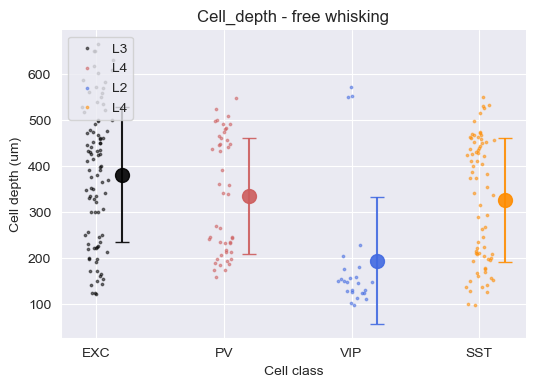

In [102]:
"""Plotting"""
# Define figure
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4), dpi=100)
remove_top_right_frame(ax)

# Iterate over cell class
for i, c_type in enumerate(cell_class_order):

    n_cells = len(result_df[result_df.cell_type==c_type])
    obs_locations = [i]*n_cells #create a list int, to place observations categorically
    obs_values = result_df[result_df.cell_type==c_type]['cell_depth'].values
    
    print(type(obs_values))
    # Show individual observations (scatterplot with added x-axis jitter to avoid overplotting)
    jitter_scatterplot(x=obs_locations,
                       y=obs_values,
                       s=3,
                       alpha=0.5,
                       c=class_color[c_type],
                       label=result_df[result_df.cell_type==c_type]['cell_layer2'].values[0])

    # Show mean and standard deviation
    ax.errorbar(x=i+0.2,
                y=np.mean(obs_values),
                yerr=np.std(obs_values), #errobarsize is standard deviation
                marker='o',
                ms=10,
                capsize=5,
                alpha=0.9,
                c=class_color[c_type])

# Set xtick labels and legend
ax.legend(loc='upper left', fontsize=10)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cell_class_order)
ax.set_xlabel('Cell class')
ax.set_ylabel('Cell depth (um)')
ax.set_title('Cell_depth - free whisking')

In [94]:

Obs_EXC = result_df[result_df.cell_type=='EXC']['cell_depth'].values
Obs_PV = result_df[result_df.cell_type=='PV']['cell_depth'].values
Obs_VIP = result_df[result_df.cell_type=='VIP']['cell_depth'].values
Obs_SST = result_df[result_df.cell_type=='SST']['cell_depth'].values

Res=tukey_hsd(Obs_EXC, Obs_PV, Obs_VIP, Obs_SST)
print(Res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     44.847     0.276   -19.637   109.332
 (0 - 2)    185.954     0.000   104.782   267.127
 (0 - 3)     54.443     0.062    -1.899   110.785
 (1 - 0)    -44.847     0.276  -109.332    19.637
 (1 - 2)    141.107     0.000    51.915   230.300
 (1 - 3)      9.595     0.983   -57.789    76.980
 (2 - 0)   -185.954     0.000  -267.127  -104.782
 (2 - 1)   -141.107     0.000  -230.300   -51.915
 (2 - 3)   -131.512     0.000  -215.007   -48.016
 (3 - 0)    -54.443     0.062  -110.785     1.899
 (3 - 1)     -9.595     0.983   -76.980    57.789
 (3 - 2)    131.512     0.000    48.016   215.007


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='cell_type', ylabel='cell_depth'>

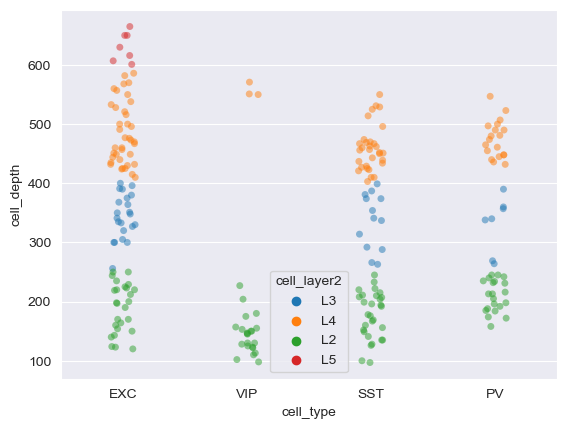

In [96]:
sns.stripplot(data=result_df, x="cell_type", y="cell_depth", jitter=True, alpha=0.5, hue='cell_layer2')

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='cell_layer2', ylabel='cell_depth'>

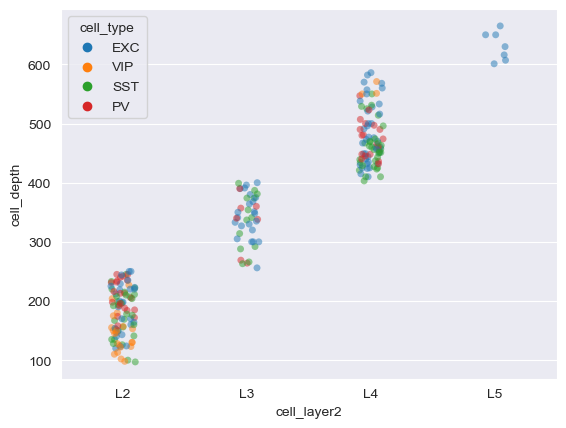

In [99]:
sns.stripplot(data=result_df, x="cell_layer2", y="cell_depth", jitter=True, alpha=0.5, hue="cell_type", order=['L2', 'L3', 'L4', 'L5'])

C:\Users\xagao\AppData\Local\Temp\ipykernel_18552\2184752489.py:24: RuntimeWarning: Mean of empty slice
  y=np.nanmean(obs_values),
C:\Users\xagao\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


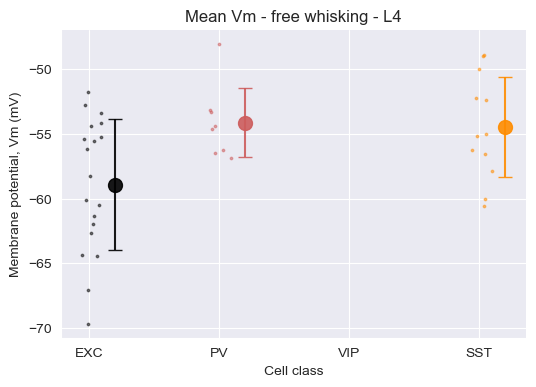

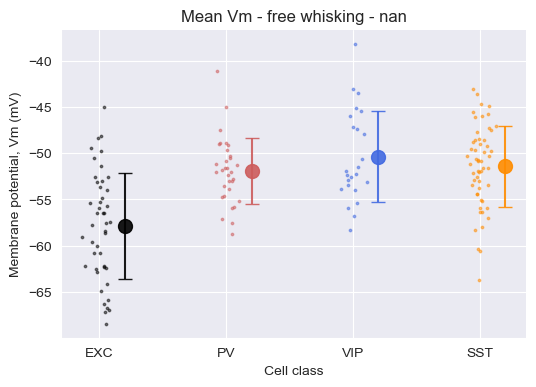

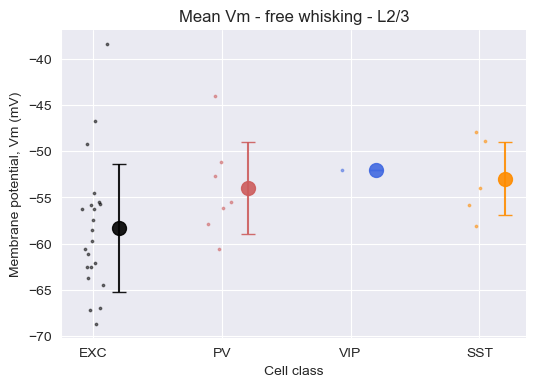

In [15]:
for layer in result_df.cell_layer.unique():
    
    l2 = result_df[result_df.cell_layer==layer]
    # Define figure
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4), dpi=100)
    remove_top_right_frame(ax)
    
    # Iterate over cell class
    for i, c_type in enumerate(cell_class_order):
    
        n_cells = len(l2[l2.cell_type==c_type])
        obs_locations = [i]*n_cells #create a list int, to place observations categorically
        obs_values = l2[l2.cell_type==c_type]['mean_vm'].values * 1000 #in mV
    
        # Show individual observations (scatterplot with added x-axis jitter to avoid overplotting)
        jitter_scatterplot(x=obs_locations,
                           y=obs_values,
                           s=3,
                           alpha=0.5,
                           c=class_color[c_type])
    
        # Show mean and standard deviation
        ax.errorbar(x=i+0.2,
                    y=np.nanmean(obs_values),
                    yerr=np.nanstd(obs_values), #errobarsize is standard deviation
                    marker='o',
                    ms=10,
                    capsize=5,
                    alpha=0.9,
                    c=class_color[c_type])
    
    # Set xtick labels and legend
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(cell_class_order)
    ax.set_xlabel('Cell class')
    ax.set_ylabel('Membrane potential, Vm (mV)')
    ax.set_title('Mean Vm - free whisking - %s' %layer)


C:\Users\xagao\AppData\Local\Temp\ipykernel_18552\947053020.py:24: RuntimeWarning: Mean of empty slice
  y=np.nanmean(obs_values),
C:\Users\xagao\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


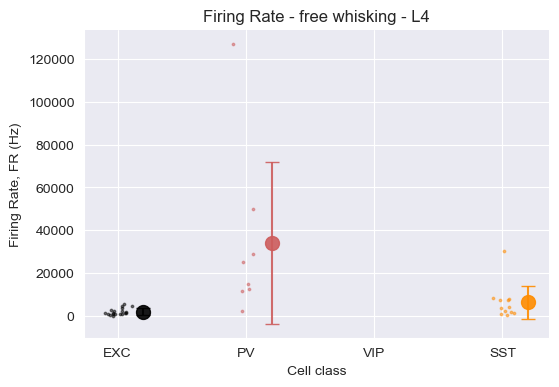

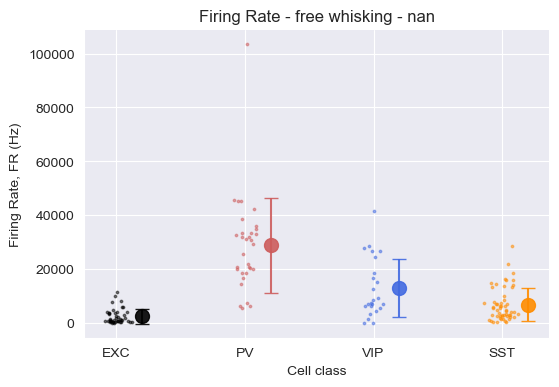

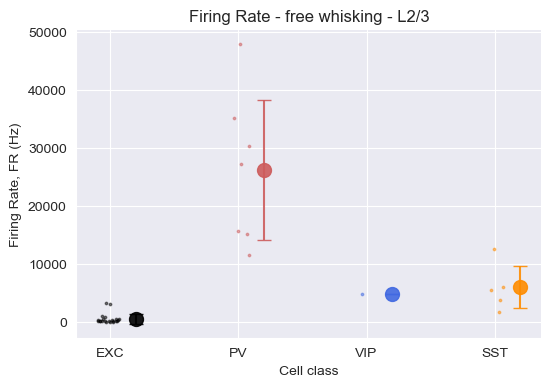

In [17]:
for layer in result_df.cell_layer.unique():

    l2 = result_df[result_df.cell_layer==layer]
    # Define figure
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4), dpi=100)
    remove_top_right_frame(ax)

    # Iterate over cell class
    for i, c_type in enumerate(cell_class_order):

        n_cells = len(l2[l2.cell_type==c_type])
        obs_locations = [i]*n_cells #create a list int, to place observations categorically
        obs_values = l2[l2.cell_type==c_type]['firing_rate'].values * 1000 #in mV

        # Show individual observations (scatterplot with added x-axis jitter to avoid overplotting)
        jitter_scatterplot(x=obs_locations,
                           y=obs_values,
                           s=3,
                           alpha=0.5,
                           c=class_color[c_type])

        # Show mean and standard deviation
        ax.errorbar(x=i+0.2,
                    y=np.nanmean(obs_values),
                    yerr=np.nanstd(obs_values), #errobarsize is standard deviation
                    marker='o',
                    ms=10,
                    capsize=5,
                    alpha=0.9,
                    c=class_color[c_type])

    # Set xtick labels and legend
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(cell_class_order)
    ax.set_xlabel('Cell class')
    ax.set_ylabel('Firing Rate, FR (Hz)')
    ax.set_title('Firing Rate - free whisking - %s' %layer)

C:\Users\xagao\AppData\Local\Temp\ipykernel_18552\2618941128.py:24: RuntimeWarning: Mean of empty slice
  y=np.nanmean(obs_values),
C:\Users\xagao\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


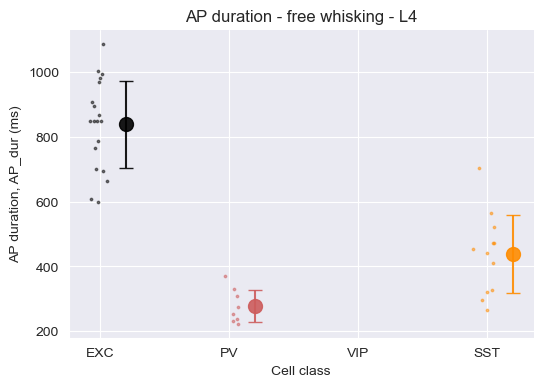

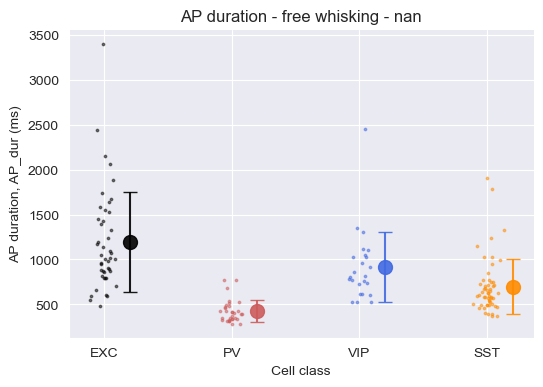

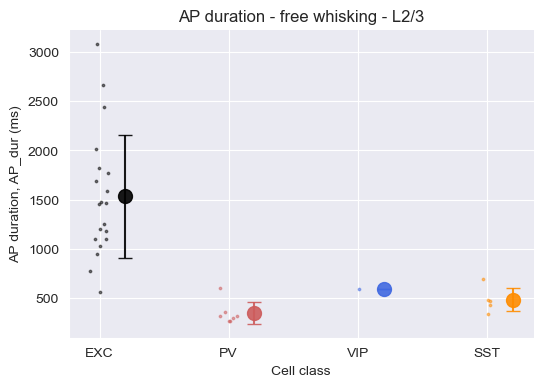

In [18]:
for layer in result_df.cell_layer.unique():

    l2 = result_df[result_df.cell_layer==layer]
    # Define figure
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4), dpi=100)
    remove_top_right_frame(ax)

    # Iterate over cell class
    for i, c_type in enumerate(cell_class_order):

        n_cells = len(l2[l2.cell_type==c_type])
        obs_locations = [i]*n_cells #create a list int, to place observations categorically
        obs_values = l2[l2.cell_type==c_type]['ap_duration'].values * 1000 #in mV

        # Show individual observations (scatterplot with added x-axis jitter to avoid overplotting)
        jitter_scatterplot(x=obs_locations,
                           y=obs_values,
                           s=3,
                           alpha=0.5,
                           c=class_color[c_type])

        # Show mean and standard deviation
        ax.errorbar(x=i+0.2,
                    y=np.nanmean(obs_values),
                    yerr=np.nanstd(obs_values), #errobarsize is standard deviation
                    marker='o',
                    ms=10,
                    capsize=5,
                    alpha=0.9,
                    c=class_color[c_type])

    # Set xtick labels and legend
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(cell_class_order)
    ax.set_xlabel('Cell class')
    ax.set_ylabel('AP duration, AP_dur (ms)')
    ax.set_title('AP duration - free whisking - %s' %layer)

C:\Users\xagao\AppData\Local\Temp\ipykernel_18552\1903654056.py:24: RuntimeWarning: Mean of empty slice
  y=np.nanmean(obs_values),
C:\Users\xagao\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


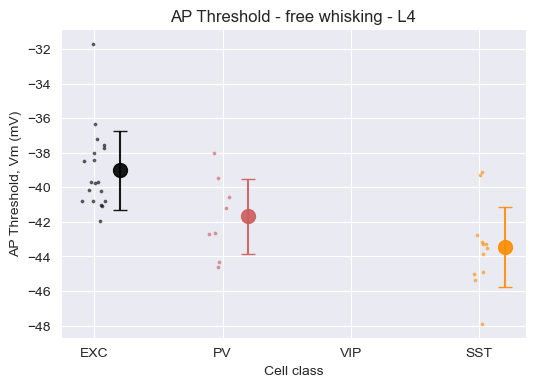

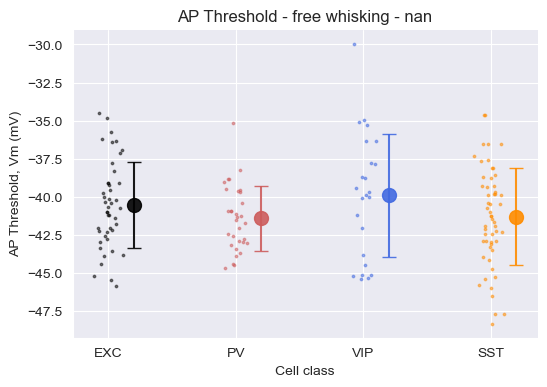

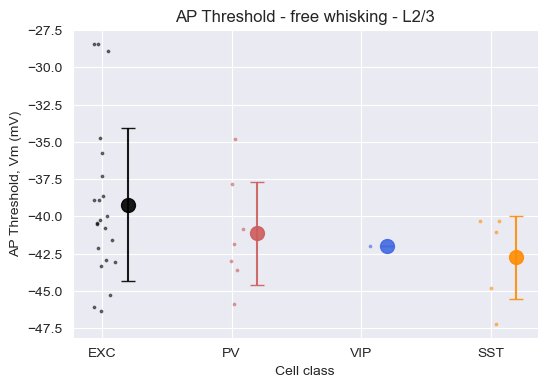

In [20]:
for layer in result_df.cell_layer.unique():

    l2 = result_df[result_df.cell_layer==layer]
    # Define figure
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4), dpi=100)
    remove_top_right_frame(ax)

    # Iterate over cell class
    for i, c_type in enumerate(cell_class_order):

        n_cells = len(l2[l2.cell_type==c_type])
        obs_locations = [i]*n_cells #create a list int, to place observations categorically
        obs_values = l2[l2.cell_type==c_type]['ap_threshold'].values * 1000 #in mV

        # Show individual observations (scatterplot with added x-axis jitter to avoid overplotting)
        jitter_scatterplot(x=obs_locations,
                           y=obs_values,
                           s=3,
                           alpha=0.5,
                           c=class_color[c_type])

        # Show mean and standard deviation
        ax.errorbar(x=i+0.2,
                    y=np.nanmean(obs_values),
                    yerr=np.nanstd(obs_values), #errobarsize is standard deviation
                    marker='o',
                    ms=10,
                    capsize=5,
                    alpha=0.9,
                    c=class_color[c_type])

    # Set xtick labels and legend
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(cell_class_order)
    ax.set_xlabel('Cell class')
    ax.set_ylabel('AP Threshold, Vm (mV)')
    ax.set_title('AP Threshold - free whisking - %s' %layer)